In [106]:
import warnings
warnings.filterwarnings(action='once')

In [2]:
# Testing rope detection 


# Tasks: 

* fix breaking code 
* detect rope using the area edge detection, image subtraction 
* ETHICS APPLICATION PLEASEEEEEEEEEEEEEEEEEEEEEE
* Relate time with frames


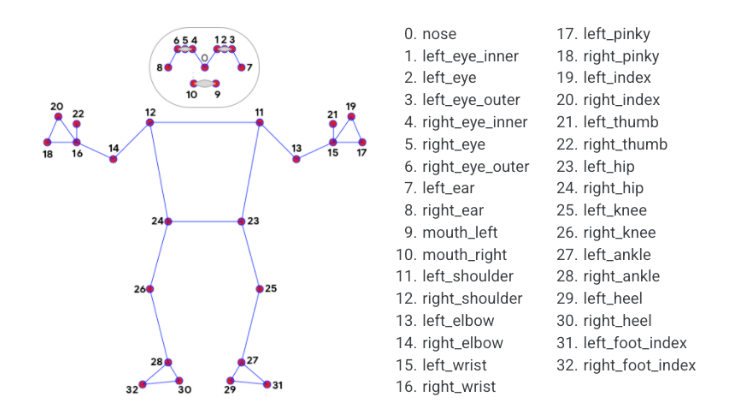

In [3]:
from IPython import display
display.Image(r"C:\Users\ayush\Desktop\img.png")

In [4]:
## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               


        cv2.imshow('Mediapipe Feed', image)


        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
        
    cap.release()
    cv2.destroyAllWindows()

Number of jumps when tracking x axis of right wrist is 9


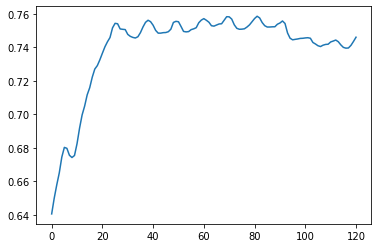

In [58]:
plt.plot(left_wrist_x)
print (f'Number of jumps when tracking x axis of right wrist is {len(argrelmin(np.array(right_wrist_x))[0])}')

Number of jumps when tracking y axis of right wrist is 11


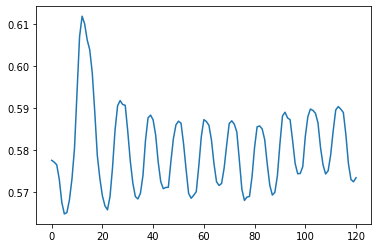

In [59]:
plt.plot(left_wrist_y)
print (f'Number of jumps when tracking y axis of right wrist is {len(argrelmin(np.array(right_wrist_y))[0])}')

In [60]:
print(f"the list of maximas for hips is as follows {argrelmax(np.array(left_hip_y))[0]}")
print(f"the list of minimas for hips is as follows {argrelmin(np.array(left_hip_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking hips {len(argrelmax(np.array(left_hip_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking hips {len(argrelmin(np.array(left_hip_y))[0])}\n")

print(f"the list of maximas for y axis left wrist is as follows {argrelmax(np.array(left_wrist_y))[0]}")
print(f"the list of minimas for y axis left wrist is as follows {argrelmin(np.array(left_wrist_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking left wrist {len(argrelmax(np.array(left_wrist_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking left wrist {len(argrelmin(np.array(left_wrist_y))[0])}\n")

print(f"the list of maximas for y axis right wrist is as follows {argrelmax(np.array(right_wrist_y))[0]}")
print(f"the list of minimas for y axis right wrist is as follows {argrelmin(np.array(right_wrist_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking right wrist {len(argrelmax(np.array(right_wrist_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking right wrist {len(argrelmin(np.array(right_wrist_y))[0])}\n")

print(f"the list of maximas for x axis right wrist is as follows {argrelmax(np.array(right_wrist_x))[0]}")
print(f"the list of minimas for x axis right wrist is as follows {argrelmin(np.array(right_wrist_x))[0]}")
print(f"The number of jumps calculated with using maximas, tracking right wrist {len(argrelmax(np.array(right_wrist_x))[0])}")
print(f"The number of jumps calculated with using minimas, tracking right wrist {len(argrelmin(np.array(right_wrist_x))[0])}\n")


print(f"the list of maximas for y axis left ankle is as follows {argrelmax(np.array(left_ankle_y))[0]}")
print(f"the list of minimas for y axis left ankle is as follows {argrelmin(np.array(left_ankle_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking left ankle {len(argrelmax(np.array(left_ankle_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking left ankle {len(argrelmin(np.array(left_ankle_y))[0])}\n")


print(f"the list of maximas for y axis right ankle is as follows {argrelmax(np.array(right_ankle_y))[0]}")
print(f"the list of minimas for y axis right ankle is as follows {argrelmin(np.array(right_ankle_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking right ankle {len(argrelmax(np.array(right_ankle_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking right ankle {len(argrelmin(np.array(right_ankle_y))[0])}\n")


the list of maximas for hips is as follows [  1  12  26  37  48  59  69  80  90 101 111]
the list of minimas for hips is as follows [  4  18  31  42  54  64  74  85  96 106 116]
The number of jumps calculated with using maximas, tracking hips 11
The number of jumps calculated with using minimas, tracking hips 11

the list of maximas for y axis left wrist is as follows [ 12  27  39  50  60  71  82  92 102 113]
the list of minimas for y axis left wrist is as follows [  5  22  34  44  55  66  76  87  97 108 119]
The number of jumps calculated with using maximas, tracking left wrist 10
The number of jumps calculated with using minimas, tracking left wrist 11

the list of maximas for y axis right wrist is as follows [ 15  27  39  50  60  70  81  92 102 112]
the list of minimas for y axis right wrist is as follows [  5  23  34  45  56  66  76  87  97 107 117]
The number of jumps calculated with using maximas, tracking right wrist 10
The number of jumps calculated with using minimas, tracking

In [7]:
# measuring the number of frames that are being considered in the video that we have obtained.
print(f"the number of elements are {len(left_hip_y)}")
print(f"the list of maximas is as follows {argrelmax(np.array(left_hip_y))[0]}")
print(f"the list of minimas is as follows {argrelmin(np.array(left_hip_y))[0]}")
print(f"The number of jumps calculated with using maximas and tracking ankles {len(argrelmax(np.array(left_ankle_y))[0])}")
print(f"The number of jumps calculated with using minimas and tracking ankles {len(argrelmin(np.array(left_ankle_y))[0])}")

print(f"The number of jumps calculated with using maximas and tracking hip {len(argrelmax(np.array(left_hip_y))[0])}")
print(f"The number of jumps calculated with using minimas and tracking hip {len(argrelmin(np.array(left_hip_y))[0])}")


the number of elements are 110
the list of maximas is as follows [  1  12  26  37  48  59  69  80  90 101]
the list of minimas is as follows [  4  18  31  42  54  64  74  85  96 106]
The number of jumps calculated with using maximas and tracking ankles 10
The number of jumps calculated with using minimas and tracking ankles 10
The number of jumps calculated with using maximas and tracking hip 10
The number of jumps calculated with using minimas and tracking hip 10


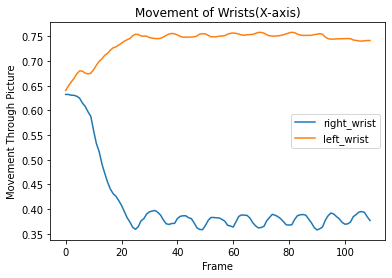

In [8]:
plt.plot(right_wrist_x)
plt.plot(left_wrist_x)
plt.xlabel("Frame")
plt.title("Movement of Wrists(X-axis)")
plt.ylabel("Movement Through Picture")
plt.legend(['right_wrist','left_wrist'])

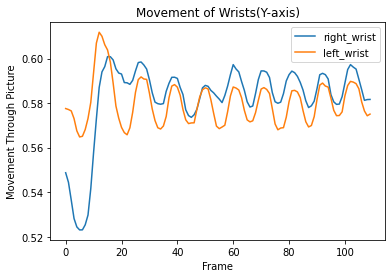

In [9]:
plt.plot(right_wrist_y)
plt.plot(left_wrist_y)
plt.xlabel("Frame")
plt.title("Movement of Wrists(Y-axis)")
plt.ylabel("Movement Through Picture")
plt.legend(['right_wrist','left_wrist'])

In [10]:
len(argrelmin(np.array(right_wrist_x))[0])

8

In [11]:
argrelmax(np.array(right_ankle_y))[0]

array([ 12,  26,  37,  48,  58,  69,  80,  90, 101], dtype=int64)

In [12]:
argrelmax(np.array(right_wrist_y))[0]

array([ 15,  27,  39,  50,  60,  70,  81,  92, 102], dtype=int64)

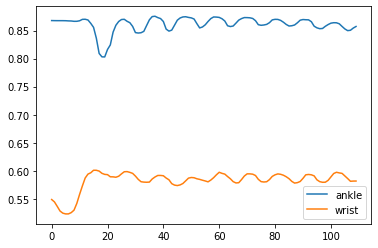

In [13]:
plt.plot(right_ankle_y)
plt.plot(right_wrist_y)
plt.legend(['ankle','wrist'])

In [14]:
# looking at dense optical flow 

In [61]:
import cv2 as cv
import numpy as np
  
  
# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
  
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
    cv.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

In [16]:
pwd

'C:\\Users\\ayush\\Desktop\\Jump Rope Code\\JupyterEnvironment'

In [17]:
import cv2
import numpy as np

 #image_path
img_path="image.jpeg"

#read image
img_raw = cv2.imread(img_path)

#select ROI function
roi = cv2.selectROI(img_raw)

#print rectangle points of selected roi
print(roi)

#Crop selected roi from raw image
roi_cropped = img_raw[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]

#show cropped image
cv2.imshow("ROI", roi_cropped)

cv2.imwrite("crop.jpeg",roi_cropped)

#hold window
cv2.waitKey(0)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


## Fixing code breaking video process: 

In [ ]:
## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []


cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               


        cv2.imshow('Mediapipe Feed', image)


        if cv2.waitKey(40) & 0xFF == ord('q'):
            break
                
        
        
    cap.release()
    cv2.destroyAllWindows()

# time relating function 


In [ ]:
# importing the xml files 

In [18]:
reader = pd.read_html(r"C:\Users\ayush\Desktop\Jump Rope Code\XML\JumpRopeChairAngleBESTANDLATEST.html")

In [22]:
df = pd.DataFrame(reader[0])

In [27]:
df[2:]

,0,1
2,0.00,0.00
3,UpJump1,0.20
4,downJump1,0.37
5,UpJump2,0.60
6,downJump2,0.77
...,...,...
114,DownJump57,45.34
115,UpJump58,45.50
116,DownJump58,45.70
117,UpJump59,45.87


In [33]:
argrelmin(np.array(left_hip_y))[0]

array([  4,  18,  31,  42,  54,  64,  74,  85,  96, 106, 116, 127, 137,
       148], dtype=int64)

In [ ]:
# 30 frames in 1 second - 

In [34]:
argrelmin(np.array(left_ankle_y))[0]

array([  8,  18,  31,  42,  53,  64,  74,  85,  96, 106, 116, 127, 137,
       148], dtype=int64)

In [35]:
argrelmin(np.array(left_foot_y))[0]

array([ 18,  31,  42,  54,  64,  74,  85,  96, 106, 116, 127, 137, 148],
      dtype=int64)

In [36]:
argrelmin(np.array(left_heel_y))[0]

array([  7,  18,  31,  42,  53,  64,  75,  85,  96, 106, 116, 127, 137,
       148], dtype=int64)

In [40]:
print(f"The number of jumps calculated with using maximas, tracking left foot {len(argrelmax(np.array(left_foot_y))[0])}")
print(f"The number of jumps calculated with using maximas, tracking left heel {len(argrelmax(np.array(left_heel_y))[0])}")


The number of jumps calculated with using maximas, tracking left foot 10
The number of jumps calculated with using maximas, tracking left heel 11


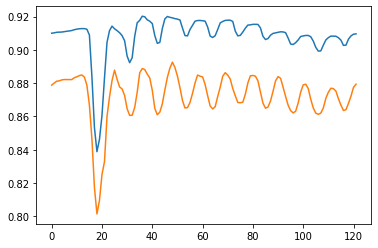

In [43]:
plt.plot(left_foot_y)
plt.plot(left_heel_y)

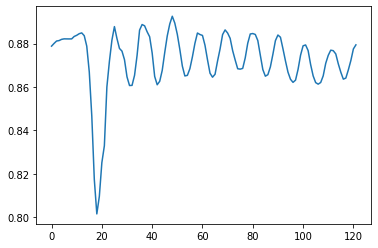

In [44]:
plt.plot(left_heel_y)

In [45]:
### timer for fps 

In [ ]:
# 30 frames in 1 second, 

In [51]:
timings_groundTruth = list(df[1][2:])

In [65]:
timings_groundTruth[:]

['0.00',
 '0.20',
 '0.37',
 '0.60',
 '0.77',
 '0.97',
 '1.17',
 '1.37',
 '1.53',
 '1.70',
 '1.87',
 '2.03',
 '2.23',
 '2.40',
 '2.57',
 '2.77',
 '2.93',
 '3.10',
 '3.27',
 '3.47',
 '3.60',
 '3.80',
 '3.97',
 '4.13',
 '4.30',
 '4.50',
 '4.67',
 '4.87',
 '5.03',
 '5.20',
 '5.37',
 '5.57',
 '5.73',
 '5.90',
 '6.07',
 '6.27',
 '6.40',
 '6.60',
 '6.77',
 '6.97',
 '7.13',
 '7.33',
 '7.50',
 '7.67',
 '7.87',
 '8.03',
 '8.23',
 '8.40',
 '8.60',
 '8.77',
 '8.93',
 '9.10',
 '9.30',
 '9.47',
 '9.63',
 '9.83',
 '10.00',
 '35.30',
 '35.63',
 '35.77',
 '35.93',
 '36.10',
 '36.30',
 '36.47',
 '36.67',
 '36.83',
 '37.03',
 '37.23',
 '37.40',
 '37.60',
 '37.77',
 '37.97',
 '38.17',
 '38.34',
 '38.54',
 '38.70',
 '38.90',
 '39.07',
 '39.24',
 '39.44',
 '39.60',
 '39.77',
 '39.94',
 '40.14',
 '40.30',
 '40.50',
 '40.67',
 '40.84',
 '41.07',
 '41.24',
 '41.40',
 '41.57',
 '41.74',
 '41.94',
 '42.10',
 '42.27',
 '42.47',
 '42.64',
 '42.80',
 '43.00',
 '43.17',
 '43.37',
 '43.54',
 '43.70',
 '43.87',
 '44.0

In [63]:
GroundTruthList=list(map(float,timings_groundTruth))

In [64]:
GroundTruthList

[0.0,
 0.2,
 0.37,
 0.6,
 0.77,
 0.97,
 1.17,
 1.37,
 1.53,
 1.7,
 1.87,
 2.03,
 2.23,
 2.4,
 2.57,
 2.77,
 2.93,
 3.1,
 3.27,
 3.47,
 3.6,
 3.8,
 3.97,
 4.13,
 4.3,
 4.5,
 4.67,
 4.87,
 5.03,
 5.2,
 5.37,
 5.57,
 5.73,
 5.9,
 6.07,
 6.27,
 6.4,
 6.6,
 6.77,
 6.97,
 7.13,
 7.33,
 7.5,
 7.67,
 7.87,
 8.03,
 8.23,
 8.4,
 8.6,
 8.77,
 8.93,
 9.1,
 9.3,
 9.47,
 9.63,
 9.83,
 10.0,
 35.3,
 35.63,
 35.77,
 35.93,
 36.1,
 36.3,
 36.47,
 36.67,
 36.83,
 37.03,
 37.23,
 37.4,
 37.6,
 37.77,
 37.97,
 38.17,
 38.34,
 38.54,
 38.7,
 38.9,
 39.07,
 39.24,
 39.44,
 39.6,
 39.77,
 39.94,
 40.14,
 40.3,
 40.5,
 40.67,
 40.84,
 41.07,
 41.24,
 41.4,
 41.57,
 41.74,
 41.94,
 42.1,
 42.27,
 42.47,
 42.64,
 42.8,
 43.0,
 43.17,
 43.37,
 43.54,
 43.7,
 43.87,
 44.07,
 44.24,
 44.44,
 44.6,
 44.77,
 44.97,
 45.17,
 45.34,
 45.5,
 45.7,
 45.87,
 46.1]

In [66]:
# 1 second has 30 frames, 

In [67]:
def get_frame_number(timeframe, frame_rate):
    """Converts a timeframe in seconds to the corresponding frame number"""
    frame_number = int(timeframe * frame_rate)
    return frame_number

In [70]:
argrelmax(np.array(right_ankle_y))[0]

array([ 12,  26,  37,  48,  58,  69,  80,  90, 101, 111], dtype=int64)

In [72]:
len(df)

119

In [77]:
GroundTruthList

[0.0,
 0.2,
 0.37,
 0.6,
 0.77,
 0.97,
 1.17,
 1.37,
 1.53,
 1.7,
 1.87,
 2.03,
 2.23,
 2.4,
 2.57,
 2.77,
 2.93,
 3.1,
 3.27,
 3.47,
 3.6,
 3.8,
 3.97,
 4.13,
 4.3,
 4.5,
 4.67,
 4.87,
 5.03,
 5.2,
 5.37,
 5.57,
 5.73,
 5.9,
 6.07,
 6.27,
 6.4,
 6.6,
 6.77,
 6.97,
 7.13,
 7.33,
 7.5,
 7.67,
 7.87,
 8.03,
 8.23,
 8.4,
 8.6,
 8.77,
 8.93,
 9.1,
 9.3,
 9.47,
 9.63,
 9.83,
 10.0,
 35.3,
 35.63,
 35.77,
 35.93,
 36.1,
 36.3,
 36.47,
 36.67,
 36.83,
 37.03,
 37.23,
 37.4,
 37.6,
 37.77,
 37.97,
 38.17,
 38.34,
 38.54,
 38.7,
 38.9,
 39.07,
 39.24,
 39.44,
 39.6,
 39.77,
 39.94,
 40.14,
 40.3,
 40.5,
 40.67,
 40.84,
 41.07,
 41.24,
 41.4,
 41.57,
 41.74,
 41.94,
 42.1,
 42.27,
 42.47,
 42.64,
 42.8,
 43.0,
 43.17,
 43.37,
 43.54,
 43.7,
 43.87,
 44.07,
 44.24,
 44.44,
 44.6,
 44.77,
 44.97,
 45.17,
 45.34,
 45.5,
 45.7,
 45.87,
 46.1]

In [76]:
get_frame_number(GroundTruthList[10],30)

56

In [80]:
GroundTruthList

[0.0,
 0.2,
 0.37,
 0.6,
 0.77,
 0.97,
 1.17,
 1.37,
 1.53,
 1.7,
 1.87,
 2.03,
 2.23,
 2.4,
 2.57,
 2.77,
 2.93,
 3.1,
 3.27,
 3.47,
 3.6,
 3.8,
 3.97,
 4.13,
 4.3,
 4.5,
 4.67,
 4.87,
 5.03,
 5.2,
 5.37,
 5.57,
 5.73,
 5.9,
 6.07,
 6.27,
 6.4,
 6.6,
 6.77,
 6.97,
 7.13,
 7.33,
 7.5,
 7.67,
 7.87,
 8.03,
 8.23,
 8.4,
 8.6,
 8.77,
 8.93,
 9.1,
 9.3,
 9.47,
 9.63,
 9.83,
 10.0,
 35.3,
 35.63,
 35.77,
 35.93,
 36.1,
 36.3,
 36.47,
 36.67,
 36.83,
 37.03,
 37.23,
 37.4,
 37.6,
 37.77,
 37.97,
 38.17,
 38.34,
 38.54,
 38.7,
 38.9,
 39.07,
 39.24,
 39.44,
 39.6,
 39.77,
 39.94,
 40.14,
 40.3,
 40.5,
 40.67,
 40.84,
 41.07,
 41.24,
 41.4,
 41.57,
 41.74,
 41.94,
 42.1,
 42.27,
 42.47,
 42.64,
 42.8,
 43.0,
 43.17,
 43.37,
 43.54,
 43.7,
 43.87,
 44.07,
 44.24,
 44.44,
 44.6,
 44.77,
 44.97,
 45.17,
 45.34,
 45.5,
 45.7,
 45.87,
 46.1]

In [208]:
## receive list of frame timings
GroundTruthFrameList = []
for i in range(len(GroundTruthList)):
    GroundTruthFrameList.append(get_frame_number(GroundTruthList[i],30))

In [209]:
GroundTruthFrameList

[0,
 6,
 11,
 18,
 23,
 29,
 35,
 41,
 45,
 51,
 56,
 60,
 66,
 72,
 77,
 83,
 87,
 93,
 98,
 104,
 108,
 114,
 119,
 123,
 129,
 135,
 140,
 146,
 150,
 156,
 161,
 167,
 171,
 177,
 182,
 188,
 192,
 198,
 203,
 209,
 213,
 219,
 225,
 230,
 236,
 240,
 246,
 252,
 258,
 263,
 267,
 273,
 279,
 284,
 288,
 294,
 300,
 1059,
 1068,
 1073,
 1077,
 1083,
 1089,
 1094,
 1100,
 1104,
 1110,
 1116,
 1122,
 1128,
 1133,
 1139,
 1145,
 1150,
 1156,
 1161,
 1167,
 1172,
 1177,
 1183,
 1188,
 1193,
 1198,
 1204,
 1209,
 1215,
 1220,
 1225,
 1232,
 1237,
 1242,
 1247,
 1252,
 1258,
 1263,
 1268,
 1274,
 1279,
 1284,
 1290,
 1295,
 1301,
 1306,
 1311,
 1316,
 1322,
 1327,
 1333,
 1338,
 1343,
 1349,
 1355,
 1360,
 1365,
 1371,
 1376,
 1383]

In [84]:
argrelmax(np.array(right_wrist_y))[0]

array([ 15,  27,  39,  50,  60,  70,  81,  92, 102, 112], dtype=int64)

##  Final Frame and time relater 


In [152]:
def get_frame_number(timeframe, frame_rate):
    """Converts a timeframe in seconds to the corresponding frame number"""
    frame_number = int(timeframe * frame_rate)
    return frame_number

In [85]:
reader = pd.read_html(r"C:\Users\ayush\Desktop\Jump Rope Code\XML\JumpRopeChairAngleBESTANDLATEST.html")

In [169]:
groundTruth = pd.DataFrame(reader[0])

In [186]:
groundTruth

,0,1,UpTable,DownTable
0,Key Images,Key Images,False,False
1,Name,Time,False,False
2,0.00,0.00,False,False
3,UpJump1,0.20,True,False
4,downJump1,0.37,False,True
...,...,...,...,...
114,DownJump57,45.34,False,True
115,UpJump58,45.50,True,False
116,DownJump58,45.70,False,True
117,UpJump59,45.87,True,False


In [187]:
groundTruth = groundTruth[2:]

In [192]:
groundTruth

,0,1,UpTable,DownTable
2,0.00,0.00,False,False
3,UpJump1,0.20,True,False
4,downJump1,0.37,False,True
5,UpJump2,0.60,True,False
6,downJump2,0.77,False,True
...,...,...,...,...
114,DownJump57,45.34,False,True
115,UpJump58,45.50,True,False
116,DownJump58,45.70,False,True
117,UpJump59,45.87,True,False


In [193]:
groundTruth.reindex()

,0,1,UpTable,DownTable
2,0.00,0.00,False,False
3,UpJump1,0.20,True,False
4,downJump1,0.37,False,True
5,UpJump2,0.60,True,False
6,downJump2,0.77,False,True
...,...,...,...,...
114,DownJump57,45.34,False,True
115,UpJump58,45.50,True,False
116,DownJump58,45.70,False,True
117,UpJump59,45.87,True,False


In [171]:
type(groundTruth[0])

pandas.core.series.Series

In [177]:
groundTruth[1]

0      Key Images
1            Time
2            0.00
3            0.20
4            0.37
          ...    
114         45.34
115         45.50
116         45.70
117         45.87
118         46.10
Name: 1, Length: 119, dtype: object

In [173]:
groundTruth[1][]

'45.70'

In [182]:
FrameList = []
for i in range(len(groundTruth)):
    FrameList.append(get_frame_number(groundTruth[2:][][i],30))

TypeError: cannot convert the series to <class 'int'>

In [144]:
groundTruth["UpTable"]= groundTruth[0].str.contains("Up",case = False)

In [145]:
groundTruth['DownTable']= groundTruth[0].str.contains('Down',case=False)

In [146]:
groundTruth

,0,1,UpTable,DownTable
0,Key Images,Key Images,False,False
1,Name,Time,False,False
2,0.00,0.00,False,False
3,UpJump1,0.20,True,False
4,downJump1,0.37,False,True
...,...,...,...,...
114,DownJump57,45.34,False,True
115,UpJump58,45.50,True,False
116,DownJump58,45.70,False,True
117,UpJump59,45.87,True,False


In [151]:
groundTruth[groundTruth['DownTable']]

,0,1,UpTable,DownTable
4,downJump1,0.37,False,True
6,downJump2,0.77,False,True
8,DownJump3,1.17,False,True
10,DownJump4,1.53,False,True
12,DownJump5,1.87,False,True
14,DownJump6,2.23,False,True
16,DownJump8,2.57,False,True
18,DownJump9,2.93,False,True
20,DownJump10,3.27,False,True
22,DownJump11,3.60,False,True


In [139]:
groundTruth['DownTable']

0      true
1      true
2      true
3      true
4      true
       ... 
114    true
115    true
116    true
117    true
118    true
Name: DownTable, Length: 119, dtype: object

# RoughWorking area will have most of the works that I have done
## contains the following : 
* data engineering for ground truth 
* comparing ground truth and making the curves 
* applying the rope detection technique finally 


# make 2 dfs in which one has all the up jumps which can be compared with maximas and another with jumps labelled as down which has all the jumps labelled as down to compare with the maximas 

'0.20'

In [2]:
## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        
        if ret: 

            # Recolor image to RGB

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                left_ankle_x.append(landmarks[27].x)
                right_ankle_x.append(landmarks[28].x)
                left_ankle_y.append(landmarks[27].y)
                right_ankle_y.append(landmarks[28].y)            
                right_hip_y.append(landmarks[23].y)            
                left_hip_y.append(landmarks[24].y)
                left_wrist_y.append(landmarks[15].y)
                left_wrist_x.append(landmarks[15].x)
                right_wrist_y.append(landmarks[16].y)
                right_wrist_x.append(landmarks[16].x)
                left_heel_y.append(landmarks[29].y)
                right_heel_y.append(landmarks[30].y)
                left_foot_y.append(landmarks[31].y)
                right_foot_y.append(landmarks[32].y)

            except:
                pass


            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               


            cv2.imshow('Mediapipe Feed', image)


            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        else: 
            break

        
    cap.release()
    cv2.destroyAllWindows()

In [1]:
### 18/02/2023 Fixing ground Truth curve 

In [14]:
reader = pd.read_html(r"C:\Users\ayush\Desktop\Jump Rope Code\XML\JumpRopeChairAngleBESTANDLATEST.html")

In [15]:
GroundTruth = pd.DataFrame(reader[0])

In [16]:
GroundTruth

,0,1
0,Key Images,Key Images
1,Name,Time
2,0.00,0.00
3,UpJump1,0.20
4,downJump1,0.37
...,...,...
114,DownJump57,45.34
115,UpJump58,45.50
116,DownJump58,45.70
117,UpJump59,45.87


In [17]:
Modified_GroundTruth = GroundTruth[2:]

In [18]:
Modified_GroundTruth

,0,1
2,0.00,0.00
3,UpJump1,0.20
4,downJump1,0.37
5,UpJump2,0.60
6,downJump2,0.77
...,...,...
114,DownJump57,45.34
115,UpJump58,45.50
116,DownJump58,45.70
117,UpJump59,45.87


In [19]:
for i in range(len(Modified_GroundTruth)):
    print(i+2)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


In [20]:
type(Modified_GroundTruth[1][3])

str

In [21]:
timingsList = Modified_GroundTruth[1]

In [22]:
float_timings = list(map(float,timingsList))

In [23]:
Modified_GroundTruth['Timings'] = float_timings

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/2060624013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_GroundTruth['Timings'] = float_timings


In [24]:
Modified_GroundTruth[1].drop(columns=['1'])

2       0.00
3       0.20
4       0.37
5       0.60
6       0.77
       ...  
114    45.34
115    45.50
116    45.70
117    45.87
118    46.10
Name: 1, Length: 117, dtype: object

In [25]:
del Modified_GroundTruth[1]

In [26]:
Modified_GroundTruth

,0,Timings
2,0.00,0.00
3,UpJump1,0.20
4,downJump1,0.37
5,UpJump2,0.60
6,downJump2,0.77
...,...,...
114,DownJump57,45.34
115,UpJump58,45.50
116,DownJump58,45.70
117,UpJump59,45.87


In [27]:
Modified_GroundTruth['Timings'][3]

0.2

In [28]:
Modified_GroundTruth

,0,Timings
2,0.00,0.00
3,UpJump1,0.20
4,downJump1,0.37
5,UpJump2,0.60
6,downJump2,0.77
...,...,...
114,DownJump57,45.34
115,UpJump58,45.50
116,DownJump58,45.70
117,UpJump59,45.87


In [29]:
def get_frame_number(timeframe, frame_rate):
    """Converts a timeframe in seconds to the corresponding frame number"""
    frame_number = int(timeframe * frame_rate)
    return frame_number

In [30]:
get_frame_number(Modified_GroundTruth['Timings'][3],30)

6

In [31]:
Modified_frame_list = []
for i in range(len(Modified_GroundTruth)):
    Modified_frame_list.append(get_frame_number(Modified_GroundTruth['Timings'][i+2],30))

In [32]:
Modified_GroundTruth["Frames"] = Modified_frame_list

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/3871016015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_GroundTruth["Frames"] = Modified_frame_list


In [33]:
Modified_GroundTruth

,0,Timings,Frames
2,0.00,0.00,0
3,UpJump1,0.20,6
4,downJump1,0.37,11
5,UpJump2,0.60,18
6,downJump2,0.77,23
...,...,...,...
114,DownJump57,45.34,1360
115,UpJump58,45.50,1365
116,DownJump58,45.70,1371
117,UpJump59,45.87,1376


In [34]:
Modified_GroundTruth["UpTable"]= Modified_GroundTruth[0].str.contains("Up",case = False)

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/4080956032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_GroundTruth["UpTable"]= Modified_GroundTruth[0].str.contains("Up",case = False)


In [35]:
Modified_GroundTruth["DownTable"]= Modified_GroundTruth[0].str.contains("Down",case = False)

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/2474619296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Modified_GroundTruth["DownTable"]= Modified_GroundTruth[0].str.contains("Down",case = False)


In [36]:
Modified_GroundTruth

,0,Timings,Frames,UpTable,DownTable
2,0.00,0.00,0,False,False
3,UpJump1,0.20,6,True,False
4,downJump1,0.37,11,False,True
5,UpJump2,0.60,18,True,False
6,downJump2,0.77,23,False,True
...,...,...,...,...,...
114,DownJump57,45.34,1360,False,True
115,UpJump58,45.50,1365,True,False
116,DownJump58,45.70,1371,False,True
117,UpJump59,45.87,1376,True,False


In [37]:
DownTable  = Modified_GroundTruth[Modified_GroundTruth["DownTable"]]

In [38]:
del DownTable["UpTable"]

In [39]:
DownTable.rename(columns = {'0':"JumpName"},inplace = True)

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/3135309042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DownTable.rename(columns = {'0':"JumpName"},inplace = True)


In [40]:
DownTable.columns = ['JumpName', "Timings", "Frames","DownTable"]

In [41]:
DownTable

,JumpName,Timings,Frames,DownTable
4,downJump1,0.37,11,True
6,downJump2,0.77,23,True
8,DownJump3,1.17,35,True
10,DownJump4,1.53,45,True
12,DownJump5,1.87,56,True
14,DownJump6,2.23,66,True
16,DownJump8,2.57,77,True
18,DownJump9,2.93,87,True
20,DownJump10,3.27,98,True
22,DownJump11,3.60,108,True


In [42]:
UpTable  = Modified_GroundTruth[Modified_GroundTruth["UpTable"]]

In [43]:
del UpTable['DownTable']

In [44]:
UpTable.columns = ['JumpName',"Timings","Frames","UpTable"]

In [45]:
UpTable

,JumpName,Timings,Frames,UpTable
3,UpJump1,0.20,6,True
5,UpJump2,0.60,18,True
7,UpJump3,0.97,29,True
9,UpJump4,1.37,41,True
11,UpJump5,1.70,51,True
13,UpJump6,2.03,60,True
15,UpJump7,2.40,72,True
17,UpJump9,2.77,83,True
19,UpJump10,3.10,93,True
21,UpJump11,3.47,104,True


## Graphing stuff 

In [9]:
## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        
        if ret: 

            # Recolor image to RGB

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                left_ankle_x.append(landmarks[27].x)
                right_ankle_x.append(landmarks[28].x)
                left_ankle_y.append(landmarks[27].y)
                right_ankle_y.append(landmarks[28].y)            
                right_hip_y.append(landmarks[23].y)            
                left_hip_y.append(landmarks[24].y)
                left_wrist_y.append(landmarks[15].y)
                left_wrist_x.append(landmarks[15].x)
                right_wrist_y.append(landmarks[16].y)
                right_wrist_x.append(landmarks[16].x)
                left_heel_y.append(landmarks[29].y)
                right_heel_y.append(landmarks[30].y)
                left_foot_y.append(landmarks[31].y)
                right_foot_y.append(landmarks[32].y)

            except:
                pass


            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               


            cv2.imshow('Mediapipe Feed', image)


            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        else: 
            break

        
    cap.release()
    cv2.destroyAllWindows()

In [10]:
print(f"the list of maximas for hips is as follows {argrelmax(np.array(left_hip_y))[0]}")
print(f"the list of minimas for hips is as follows {argrelmin(np.array(left_hip_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking hips {len(argrelmax(np.array(left_hip_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking hips {len(argrelmin(np.array(left_hip_y))[0])}\n")

print(f"the list of maximas for y axis left wrist is as follows {argrelmax(np.array(left_wrist_y))[0]}")
print(f"the list of minimas for y axis left wrist is as follows {argrelmin(np.array(left_wrist_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking left wrist {len(argrelmax(np.array(left_wrist_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking left wrist {len(argrelmin(np.array(left_wrist_y))[0])}\n")

print(f"the list of maximas for y axis right wrist is as follows {argrelmax(np.array(right_wrist_y))[0]}")
print(f"the list of minimas for y axis right wrist is as follows {argrelmin(np.array(right_wrist_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking right wrist y {len(argrelmax(np.array(right_wrist_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking right wrist y {len(argrelmin(np.array(right_wrist_y))[0])}\n")

print(f"the list of maximas for x axis right wrist is as follows {argrelmax(np.array(right_wrist_x))[0]}")
print(f"the list of minimas for x axis right wrist is as follows {argrelmin(np.array(right_wrist_x))[0]}")
print(f"The number of jumps calculated with using maximas, tracking right wrist x {len(argrelmax(np.array(right_wrist_x))[0])}")
print(f"The number of jumps calculated with using minimas, tracking right wrist x {len(argrelmin(np.array(right_wrist_x))[0])}\n")


print(f"the list of maximas for y axis left ankle is as follows {argrelmax(np.array(left_ankle_y))[0]}")
print(f"the list of minimas for y axis left ankle is as follows {argrelmin(np.array(left_ankle_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking left ankle {len(argrelmax(np.array(left_ankle_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking left ankle {len(argrelmin(np.array(left_ankle_y))[0])}\n")


print(f"the list of maximas for y axis right ankle is as follows {argrelmax(np.array(right_ankle_y))[0]}")
print(f"the list of minimas for y axis right ankle is as follows {argrelmin(np.array(right_ankle_y))[0]}")
print(f"The number of jumps calculated with using maximas, tracking right ankle {len(argrelmax(np.array(right_ankle_y))[0])}")
print(f"The number of jumps calculated with using minimas, tracking right ankle {len(argrelmin(np.array(right_ankle_y))[0])}\n")


the list of maximas for hips is as follows [   1   12   26   37   48   59   69   80   90  101  111  122  132  143
  153  164  174  185  195  206  216  227  238  249  260  271  281  292
  302  314  327  339  349  360  370  381  391  402  412  423  433  444
  454  465  474  485  496  506  516  527  537  547  557  567  578  589
  599  609  619  630  640  651  661  671  681  692  702  713  724  734
  744  756  765  777  787  798  808  818  828  839  849  858  870  879
  890  901  911  921  933  942  954  964  975  984  995 1005 1015 1027
 1037 1047 1057 1069 1081 1091 1102 1113 1124 1135 1146 1158 1169 1179
 1190 1201 1211 1222 1233 1244 1255 1265 1276 1287 1298 1308 1318 1329
 1340 1351 1362 1373 1384 1397 1405 1412 1415 1425 1427 1430 1443 1454
 1462 1472 1474]
the list of minimas for hips is as follows [   4   18   31   42   54   64   74   85   96  106  116  127  137  148
  159  170  180  190  201  212  222  233  244  254  266  276  287  297
  308  321  333  343  354  364  375  386  397

In [11]:
len(argrelmax(np.array(right_ankle_y))[0])

112

In [12]:
argrelmax(np.array(right_ankle_y))

(array([  12,   26,   37,   48,   58,   69,   80,   90,  101,  111,  121,
         133,  142,  154,  164,  174,  185,  196,  206,  217,  228,  238,
         250,  260,  271,  281,  292,  302,  312,  327,  348,  370,  391,
         412,  432,  434,  454,  474,  494,  516,  536,  556,  578,  599,
         619,  639,  660,  681,  702,  722,  725,  743,  765,  787,  807,
         828,  848,  870,  889,  911,  932,  953,  974,  995, 1015, 1037,
        1057, 1069, 1080, 1092, 1102, 1113, 1124, 1135, 1146, 1157, 1169,
        1179, 1190, 1201, 1212, 1222, 1233, 1244, 1255, 1265, 1276, 1287,
        1297, 1308, 1319, 1330, 1340, 1351, 1362, 1373, 1384, 1395, 1409,
        1415, 1427, 1436, 1438, 1440, 1449, 1452, 1454, 1471, 1475, 1479,
        1485, 1488], dtype=int64),)

In [13]:
DownTable["Frames"][:len(argrelmax(np.array(right_ankle_y))[0])]

NameError: name 'DownTable' is not defined

In [40]:
UpTable["Frames"][:8]

C:\Users\ayush\AppData\Local\Temp/ipykernel_13336/3201735378.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  UpTable["Frames"][:8]


3      6
5     18
7     29
9     41
11    51
13    60
15    72
17    83
Name: Frames, dtype: int64

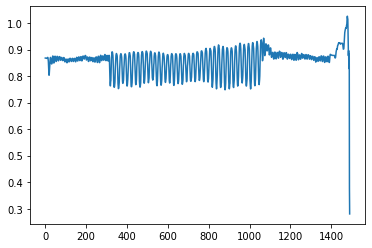

In [46]:
plt.plot(right_ankle_y)

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/48510011.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(UpTable['Frames'][:10])


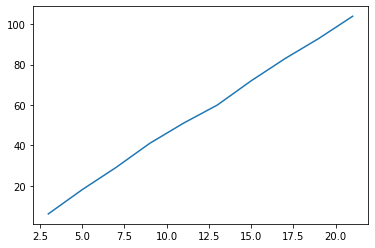

In [47]:
plt.plot(UpTable['Frames'][:10])

In [50]:
ankleframes=argrelmax(np.array(right_ankle_y))

In [51]:
GTframes = np.array(DownTable['Frames'][:len(argrelmax(np.array(right_ankle_y))[0])])

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/3993618730.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  GTframes = np.array(DownTable['Frames'][:len(argrelmax(np.array(right_ankle_y))[0])])


In [52]:
(ankleframes - GTframes).max()

ValueError: operands could not be broadcast together with shapes (1,112) (57,) 

In [53]:
#relating the time frame from ground truth and the recorded time frames somehow

In [54]:
argrelmin(np.array(left_ankle_y))[0]

array([   8,   18,   31,   42,   53,   64,   74,   85,   96,  106,  116,
        127,  137,  148,  158,  169,  179,  190,  200,  211,  222,  233,
        243,  254,  265,  276,  287,  297,  307,  325,  348,  370,  391,
        412,  433,  454,  474,  495,  515,  536,  556,  577,  598,  619,
        640,  660,  681,  702,  723,  744,  765,  786,  808,  827,  839,
        849,  870,  890,  911,  932,  953,  974,  995, 1016, 1036, 1057,
       1074, 1086, 1097, 1108, 1118, 1130, 1141, 1152, 1163, 1174, 1185,
       1196, 1206, 1217, 1228, 1239, 1249, 1260, 1271, 1282, 1293, 1303,
       1314, 1324, 1335, 1345, 1356, 1367, 1379, 1390, 1401, 1407, 1412,
       1416, 1421, 1425, 1441, 1450, 1453, 1459, 1461, 1465, 1472, 1480,
       1486], dtype=int64)

In [55]:
np.array(DownTable['Frames'][:len(argrelmin(np.array(left_ankle_y))[0])])

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/4152760931.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(DownTable['Frames'][:len(argrelmin(np.array(left_ankle_y))[0])])


array([  11,   23,   35,   45,   56,   66,   77,   87,   98,  108,  119,
        129,  150,  161,  171,  182,  192,  203,  213,  225,  236,  246,
        258,  267,  279,  288,  300, 1068, 1077, 1089, 1100, 1110, 1122,
       1133, 1145, 1156, 1167, 1177, 1188, 1198, 1209, 1220, 1232, 1242,
       1252, 1263, 1274, 1284, 1295, 1306, 1316, 1327, 1338, 1349, 1360,
       1371, 1383], dtype=int64)

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/3667309433.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(range(len(argrelmin(np.array(left_ankle_y))[0])),np.array(DownTable['Frames'][:len(argrelmin(np.array(left_ankle_y))[0])]),marker = 'x', label = "GroundTruth")


ValueError: x and y must be the same size

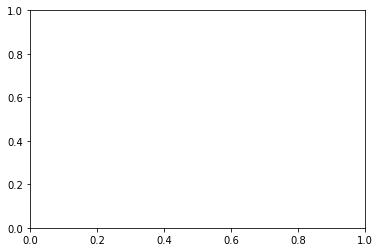

In [56]:
plt.scatter(range(len(argrelmin(np.array(left_ankle_y))[0])),np.array(DownTable['Frames'][:len(argrelmin(np.array(left_ankle_y))[0])]),marker = 'x', label = "GroundTruth")
plt.scatter(range(len(argrelmin(np.array(left_ankle_y))[0])),argrelmin(np.array(left_ankle_y))[0], marker = 's', label = 'movemnt of left Ankle')
plt.legend()
plt.ylabel("Frame Number")
plt.xlabel("Jump Number")
plt.title("Framewise comparison of jump identification in GroundTruth and algorithm(Looking at minimas)")
print(f"The number of jumps calculated with using maximas, tracking left ankle {len(argrelmin(np.array(left_ankle_y))[0])}")
plt.show

C:\Users\ayush\AppData\Local\Temp/ipykernel_3036/2582135359.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(range(len(argrelmax(np.array(left_ankle_y))[0])),np.array(DownTable['Frames'][:len(argrelmax(np.array(left_ankle_y))[0])]),marker = 'x', label = "GroundTruth")


ValueError: x and y must be the same size

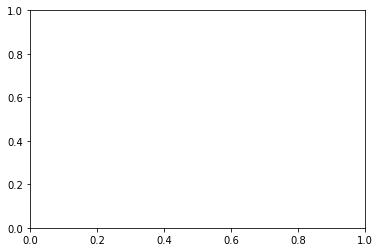

In [57]:
plt.scatter(range(len(argrelmax(np.array(left_ankle_y))[0])),np.array(DownTable['Frames'][:len(argrelmax(np.array(left_ankle_y))[0])]),marker = 'x', label = "GroundTruth")
plt.scatter(range(len(argrelmax(np.array(left_ankle_y))[0])),argrelmax(np.array(left_ankle_y))[0], marker = 's', label = 'movemnt of left Ankle')
plt.legend()
plt.ylabel("Frame Number")
plt.xlabel("Jump Number")
plt.title("Framewise comparison of jump identification in GroundTruth and algorithm(Looking at maximas)")
print(f"The number of jumps calculated with using maximas, tracking left ankle {len(argrelmax(np.array(left_ankle_y))[0])}")
print(f"Maximum difference found between the frames is {max(abs(np.array(DownTable['Frames'][:len(argrelmax(np.array(left_ankle_y))[0][:-1])])-argrelmax(np.array(left_ankle_y))[0][1:]))}")
plt.show

In [58]:
import warnings
warnings.filterwarnings('ignore')

ValueError: x and y must be the same size

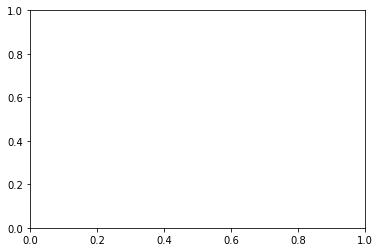

In [59]:
plt.scatter(range(len(argrelmax(np.array(left_hip_y))[0])),np.array(UpTable['Frames'][:len(argrelmax(np.array(left_hip_y))[0])]),marker = 'x', label = "GroundTruth")
plt.scatter(range(len(argrelmax(np.array(left_hip_y))[0])),argrelmax(np.array(left_hip_y))[0], marker = 's', label = 'movemnt of left hip')
plt.legend()
plt.ylabel("Frame Number")
plt.xlabel("Jump Number")
plt.title("Framewise comparison of jump identification in GroundTruth and algorithm(looking at maximas)")
print(f"The number of jumps calculated with using maximas, tracking left hip {len(argrelmax(np.array(left_hip_y))[0])}")
plt.show
print(f"Maximum difference found between the frames is {max(abs(np.array(DownTable['Frames'][:len(argrelmax(np.array(left_hip_y))[0][:-1])])-argrelmax(np.array(left_hip_y))[0][1:]))}")

In [ ]:
max(abs(np.array(DownTable['Frames'][:len(argrelmax(np.array(right_ankle_y))[0])])-argrelmax(np.array(right_ankle_y))[0]))

In [60]:
DownTable['Frames'][:12]

4      11
6      23
8      35
10     45
12     56
14     66
16     77
18     87
20     98
22    108
24    119
26    129
Name: Frames, dtype: int64

In [61]:
argrelmax(np.array(right_ankle_y))

(array([  12,   26,   37,   48,   58,   69,   80,   90,  101,  111,  121,
         133,  142,  154,  164,  174,  185,  196,  206,  217,  228,  238,
         250,  260,  271,  281,  292,  302,  312,  327,  348,  370,  391,
         412,  432,  434,  454,  474,  494,  516,  536,  556,  578,  599,
         619,  639,  660,  681,  702,  722,  725,  743,  765,  787,  807,
         828,  848,  870,  889,  911,  932,  953,  974,  995, 1015, 1037,
        1057, 1069, 1080, 1092, 1102, 1113, 1124, 1135, 1146, 1157, 1169,
        1179, 1190, 1201, 1212, 1222, 1233, 1244, 1255, 1265, 1276, 1287,
        1297, 1308, 1319, 1330, 1340, 1351, 1362, 1373, 1384, 1395, 1409,
        1415, 1427, 1436, 1438, 1440, 1449, 1452, 1454, 1471, 1475, 1479,
        1485, 1488], dtype=int64),)

In [62]:
print(f"Maximum difference found between the frames is {max(abs(np.array(DownTable['Frames'][:len(argrelmax(np.array(right_ankle_y))[0])])-argrelmax(np.array(right_ankle_y))[0]))}")

ValueError: operands could not be broadcast together with shapes (57,) (112,) 

In [63]:
np.array(DownTable['Frames'][:len(argrelmax(np.array(left_hip_y))[0])])[:-1]

array([  11,   23,   35,   45,   56,   66,   77,   87,   98,  108,  119,
        129,  150,  161,  171,  182,  192,  203,  213,  225,  236,  246,
        258,  267,  279,  288,  300, 1068, 1077, 1089, 1100, 1110, 1122,
       1133, 1145, 1156, 1167, 1177, 1188, 1198, 1209, 1220, 1232, 1242,
       1252, 1263, 1274, 1284, 1295, 1306, 1316, 1327, 1338, 1349, 1360,
       1371], dtype=int64)

In [64]:
argrelmax(np.array(left_hip_y))[0][1:]

array([  12,   26,   37,   48,   59,   69,   80,   90,  101,  111,  122,
        132,  143,  153,  164,  174,  185,  195,  206,  216,  227,  238,
        249,  260,  271,  281,  292,  302,  314,  327,  339,  349,  360,
        370,  381,  391,  402,  412,  423,  433,  444,  454,  465,  474,
        485,  496,  506,  516,  527,  537,  547,  557,  567,  578,  589,
        599,  609,  619,  630,  640,  651,  661,  671,  681,  692,  702,
        713,  724,  734,  744,  756,  765,  777,  787,  798,  808,  818,
        828,  839,  849,  858,  870,  879,  890,  901,  911,  921,  933,
        942,  954,  964,  975,  984,  995, 1005, 1015, 1027, 1037, 1047,
       1057, 1069, 1081, 1091, 1102, 1113, 1124, 1135, 1146, 1158, 1169,
       1179, 1190, 1201, 1211, 1222, 1233, 1244, 1255, 1265, 1276, 1287,
       1298, 1308, 1318, 1329, 1340, 1351, 1362, 1373, 1384, 1397, 1405,
       1412, 1415, 1425, 1427, 1430, 1443, 1454, 1462, 1472, 1474],
      dtype=int64)

# Rope Detection Dear 

## Main Ideas are as follows: 
* Get coordinates of the hand placement 
* form a bounding rectangle in which we will be applying our techniques
* apply image subtraction, get edge detector, form contour, record angles produced in each frame, get the frame coordinate of produced maximas and minimas. 

In [65]:
import cv2

# Load the video file
cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g01_c01.avi")

# Define the background subtractor
fgbg = cv2.createBackgroundSubtractorKNN()

# Set the bounding box size and position
x, y, w, h = 200, 200, 100, 100

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    if ret:
        # Apply background subtraction
        fgmask = fgbg.apply(frame)

        # Get the ROI from the frame
        roi = fgmask[y:y+h, x:x+w]

        # Find contours in the ROI
        contours, hierarchy = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw the bounding rectangle around the moving object
        if contours:
            cnt = max(contours, key=cv2.contourArea)
            x1, y1, w1, h1 = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x+x1, y+y1), (x+x1+w1, y+y1+h1), (0, 255, 0), 2)

        # Display the video with the bounding box
        cv2.imshow('frame', frame)

        # Exit the program when 'q' is pressed
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

# Release the video capture and destroy all windows
cap.release()
cv2.destroyAllWindows()

In [71]:
import cv2 as cv
import numpy as np


#backSub = cv.createBackgroundSubtractorKNN()
backSub = cv.createBackgroundSubtractorMOG2()

capture = cv.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

if not capture.isOpened():
    print('Unable to open')
    exit(0)


while True:
    ret, frame = capture.read()
    if frame is None:
        break

    if ret:

        frame = cv.resize(frame, (800,800))


        fgMask = backSub.apply(frame)


        kernel = np.ones((5,5), np.uint8)

        fgMask = cv.erode(fgMask, kernel, iterations=2)
        fgMask = cv.dilate(fgMask, kernel, iterations=2)



        cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
        cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
                   cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))


        fgMask[np.abs(fgMask) < 250] = 0


        cv.imshow('Frame', frame)
        cv.imshow('FG Mask', fgMask)


        if cv.waitKey(50) & 0xFF == ord('q'):
            break
            
    else: 
        break

# Release the video capture and destroy all windows
cap.release()
cv2.destroyAllWindows()

## good difference Code below, allows us to select roi and see how its behaving 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


ORIGINAL_WINDOW_TITLE = 'Original'
FIRST_FRAME_WINDOW_TITLE = 'First Frame'
DIFFERENCE_WINDOW_TITLE = 'Difference'


canvas = None
drawing = False # true if mouse is pressed

#Retrieve first frame
def initialize_camera(cap):
    _, frame = cap.read()
    return frame


# mouse callback function
def mouse_draw_rect(event,x,y,flags, params):
    global drawing, canvas

    if drawing:
        canvas = params[0].copy()

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        params.append((x,y)) #Save first point

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.rectangle(canvas, params[1],(x,y),(0,255,0),2)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        params.append((x,y)) #Save second point
        cv2.rectangle(canvas,params[1],params[2],(0,255,0),2)


def select_roi(frame):
    global canvas
    canvas = frame.copy()
    params = [frame]
    ROI_SELECTION_WINDOW = 'Select ROI'
    cv2.namedWindow(ROI_SELECTION_WINDOW)
    cv2.setMouseCallback(ROI_SELECTION_WINDOW, mouse_draw_rect, params)
    roi_selected = False
    while True:
        cv2.imshow(ROI_SELECTION_WINDOW, canvas)
        key = cv2.waitKey(10)

        #Press Enter to break the loop
        if key == 13:
            break;


    cv2.destroyWindow(ROI_SELECTION_WINDOW)
    roi_selected = (3 == len(params))

    if roi_selected:
        p1 = params[1]
        p2 = params[2]
        if (p1[0] == p2[0]) and (p1[1] == p2[1]):
            roi_selected = False

    #Use whole frame if ROI has not been selected
    if not roi_selected:
        print('ROI Not Selected. Using Full Frame')
        p1 = (0,0)
        p2 = (frame.shape[1] - 1, frame.shape[0] -1)


    return roi_selected, p1, p2




if __name__ == '__main__':

    cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

    #Grab first frame
    first_frame = initialize_camera(cap)

    #Select ROI for processing. Hit Enter after drawing the rectangle to finalize selection
    roi_selected, point1, point2 = select_roi(first_frame)    

    #Grab ROI of first frame
    first_frame_roi = first_frame[point1[1]:point2[1], point1[0]:point2[0], :]

    #An empty image of full size just for visualization of difference
    difference_image_canvas = np.zeros_like(first_frame)

    while cap.isOpened():

        ret, frame = cap.read()

        if ret:

            #ROI of current frame
            roi = frame[point1[1]:point2[1], point1[0]:point2[0], :]

            difference = cv2.absdiff(first_frame_roi, roi)
            difference = cv2.GaussianBlur(difference, (3, 3), 0)

            _, difference = cv2.threshold(difference, 18, 255, cv2.THRESH_BINARY)


            #Overlay computed difference image onto the whole image for visualization
            difference_image_canvas[point1[1]:point2[1], point1[0]:point2[0], :] = difference.copy()


            cv2.imshow(FIRST_FRAME_WINDOW_TITLE, first_frame)
            cv2.imshow(ORIGINAL_WINDOW_TITLE, frame)
            cv2.imshow(DIFFERENCE_WINDOW_TITLE, difference_image_canvas)


            key = cv2.waitKey(100) & 0xff
            if key == 27:
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()

### applying canny edge detection 

In [13]:
import cv2
cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")
while True:
    ret, img = cap.read()
    
    if ret:
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        canny = cv2.Canny(blur, 10, 70)
        ret, mask = cv2.threshold(canny, 70, 255, cv2.THRESH_BINARY)
        cv2.imshow('Video feed', mask)

        if cv2.waitKey(50) & 0xFF == ord('q'):
            break
    else: 
        break
        
cap.release()
cv2.destroyAllWindows()

In [15]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import cv2
import numpy as np

# Get a VideoCapture object from video and store it in vs
vc = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")
# Read first frame
ret, first_frame = vc.read()
# Scale and resize image
resize_dim = 600
max_dim = max(first_frame.shape)
scale = resize_dim/max_dim
first_frame = cv2.resize(first_frame, None, fx=scale, fy=scale)
# Convert to gray scale 
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)


# Create mask
mask = np.zeros_like(first_frame)
# Sets image saturation to maximum
mask[..., 1] = 255


out = cv2.VideoWriter('video.mp4',-1,1,(600, 600))

while(vc.isOpened()):
    # Read a frame from video
    ret, frame = vc.read()

    if ret:
        # Convert new frame format`s to gray scale and resize gray frame obtained
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=scale, fy=scale)

        # Calculate dense optical flow by Farneback method
        # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, pyr_scale = 0.5, levels = 5, winsize = 11, iterations = 5, poly_n = 5, poly_sigma = 1.1, flags = 0)
        # Compute the magnitude and angle of the 2D vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        # Set image hue according to the optical flow direction
        mask[..., 0] = angle * 180 / np.pi / 2
        # Set image value according to the optical flow magnitude (normalized)
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        # Convert HSV to RGB (BGR) color representation
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

        # Resize frame size to match dimensions
        frame = cv2.resize(frame, None, fx=scale, fy=scale)

        # Open a new window and displays the output frame
        dense_flow = cv2.addWeighted(frame, 1,rgb, 2, 0)
        cv2.imshow("Dense optical flow", dense_flow)
        out.write(dense_flow)
        # Update previous frame
        prev_gray = gray
        # Frame are read by intervals of 1 millisecond. The programs breaks out of the while loop when the user presses the 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    else: 
        break
# The following frees up resources and closes all windows
vc.release()

cv2.destroyAllWindows()



In [4]:
path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"

path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"

path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"

In [6]:
# dense optical flow 

import cv2
import numpy as np

# Get a VideoCapture object from video and store it in vs
vc = cv2.VideoCapture(path1)
# Read first frame
ret, first_frame = vc.read()
# Scale and resize image
resize_dim = 600
max_dim = max(first_frame.shape)
scale = resize_dim/max_dim
first_frame = cv2.resize(first_frame, None, fx=scale, fy=scale)
# Convert to gray scale 
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)


# Create mask
mask = np.zeros_like(first_frame)
# Sets image saturation to maximum
mask[..., 1] = 255


out = cv2.VideoWriter('video.mp4',-1,1,(600, 600))

while(vc.isOpened()):
    # Read a frame from video
    ret, frame = vc.read()

    if ret:
        # Convert new frame format`s to gray scale and resize gray frame obtained
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=scale, fy=scale)

        # Calculate dense optical flow by Farneback method
        # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, pyr_scale = 0.5, levels = 5, winsize = 11, iterations = 5, poly_n = 5, poly_sigma = 1.1, flags = 0)
        # Compute the magnitude and angle of the 2D vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        # Set image hue according to the optical flow direction
        mask[..., 0] = angle * 180 / np.pi / 2
        # Set image value according to the optical flow magnitude (normalized)
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        # Convert HSV to RGB (BGR) color representation
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

        # Resize frame size to match dimensions
        frame = cv2.resize(frame, None, fx=scale, fy=scale)

        # Open a new window and displays the output frame
        dense_flow = cv2.addWeighted(frame, 1,rgb, 2, 0)
        cv2.imshow("Dense optical flow", dense_flow)
        out.write(dense_flow)
        # Update previous frame
        prev_gray = gray
        # Frame are read by intervals of 1 millisecond. The programs breaks out of the while loop when the user presses the 'q' key
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    else: 
        break
# The following frees up resources and closes all windows
vc.release()

cv2.destroyAllWindows()



## Working with optical flow in in roi 


In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


ORIGINAL_WINDOW_TITLE = 'Original'
FIRST_FRAME_WINDOW_TITLE = 'First Frame'
DIFFERENCE_WINDOW_TITLE = 'Difference'


canvas = None
drawing = False # true if mouse is pressed

#Retrieve first frame
def initialize_camera(cap):
    _, frame = cap.read()
    return frame


# mouse callback function
def mouse_draw_rect(event,x,y,flags, params):
    global drawing, canvas

    if drawing:
        canvas = params[0].copy()

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        params.append((x,y)) #Save first point

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.rectangle(canvas, params[1],(x,y),(0,255,0),2)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        params.append((x,y)) #Save second point
        cv2.rectangle(canvas,params[1],params[2],(0,255,0),2)


def select_roi(frame):
    global canvas
    canvas = frame.copy()
    params = [frame]
    ROI_SELECTION_WINDOW = 'Select ROI'
    cv2.namedWindow(ROI_SELECTION_WINDOW)
    cv2.setMouseCallback(ROI_SELECTION_WINDOW, mouse_draw_rect, params)
    roi_selected = False
    while True:
        cv2.imshow(ROI_SELECTION_WINDOW, canvas)
        key = cv2.waitKey(10)

        #Press Enter to break the loop
        if key == 13:
            break;


    cv2.destroyWindow(ROI_SELECTION_WINDOW)
    roi_selected = (3 == len(params))

    if roi_selected:
        p1 = params[1]
        p2 = params[2]
        if (p1[0] == p2[0]) and (p1[1] == p2[1]):
            roi_selected = False

    #Use whole frame if ROI has not been selected
    if not roi_selected:
        print('ROI Not Selected. Using Full Frame')
        p1 = (0,0)
        p2 = (frame.shape[1] - 1, frame.shape[0] -1)


    return roi_selected, p1, p2





# Get a VideoCapture object from video and store it in vs
vc = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")
# Read first frame
ret, first_frame = vc.read()
# Scale and resize image
resize_dim = 600
max_dim = max(first_frame.shape)
scale = resize_dim/max_dim
first_frame = cv2.resize(first_frame, None, fx=scale, fy=scale)
# Convert to gray scale 
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)


# Create mask
mask = np.zeros_like(first_frame)
# Sets image saturation to maximum
mask[..., 1] = 255


    if ret:
        # Convert new frame format`s to gray scale and resize gray frame obtained
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=scale, fy=scale)

        # Calculate dense optical flow by Farneback method
        # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, pyr_scale = 0.5, levels = 5, winsize = 11, iterations = 5, poly_n = 5, poly_sigma = 1.1, flags = 0)
        # Compute the magnitude and angle of the 2D vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        # Set image hue according to the optical flow direction
        mask[..., 0] = angle * 180 / np.pi / 2
        # Set image value according to the optical flow magnitude (normalized)
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        # Convert HSV to RGB (BGR) color representation
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

        # Resize frame size to match dimensions
        frame = cv2.resize(frame, None, fx=scale, fy=scale)

        # Open a new window and displays the output frame
        dense_flow = cv2.addWeighted(frame, 1,rgb, 2, 0)
        cv2.imshow("Dense optical flow", dense_flow)
        out.write(dense_flow)
        # Update previous frame
        prev_gray = gray

#-------------------------------------------------------------------------------------------#        


if __name__ == '__main__':

    cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

    #Grab first frame
    first_frame = initialize_camera(cap)

    #Select ROI for processing. Hit Enter after drawing the rectangle to finalize selection
    roi_selected, point1, point2 = select_roi(first_frame)    

    #Grab ROI of first frame
    first_frame_roi = first_frame[point1[1]:point2[1], point1[0]:point2[0], :]

    #An empty image of full size just for visualization of difference
    difference_image_canvas = np.zeros_like(first_frame)

    while cap.isOpened():

        ret, frame = cap.read()

        if ret:

            #ROI of current frame
            roi = frame[point1[1]:point2[1], point1[0]:point2[0], :]

            difference = cv2.absdiff(first_frame_roi, roi)
            difference = cv2.GaussianBlur(difference, (3, 3), 0)

            _, difference = cv2.threshold(difference, 18, 255, cv2.THRESH_BINARY)


            #Overlay computed difference image onto the whole image for visualization
            difference_image_canvas[point1[1]:point2[1], point1[0]:point2[0], :] = difference.copy()


            cv2.imshow(FIRST_FRAME_WINDOW_TITLE, first_frame)
            cv2.imshow(ORIGINAL_WINDOW_TITLE, frame)
            cv2.imshow(DIFFERENCE_WINDOW_TITLE, difference_image_canvas)


            key = cv2.waitKey(100) & 0xff
            if key == 27:
                break
        else:
            break

cap.release()
cv2.destroyAllWindows()


IndentationError: unexpected indent (Temp/ipykernel_4976/484306041.py, line 99)

In [19]:
import cv2
import numpy as np


cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)



x, y, w, h = 100, 100, 200, 200  # example coordinates
while True:
    ret, frame2 = cap.read()
    if not ret:
        break
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    # calculate optical flow within the ROI
    flow = cv2.calcOpticalFlowFarneback(prvs[y:y+h, x:x+w], next[y:y+h, x:x+w], None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # visualize the optical flow
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    # show the resulting image
    cv2.imshow('Dense Optical Flow', bgr)
    if cv2.waitKey(1) == 27:
        break
    # update the previous frame
    prvs = next

ValueError: could not broadcast input array from shape (200,200) into shape (640,480)

In [25]:
pwd

'C:\\Users\\ayush\\Desktop\\Jump Rope Code\\JupyterEnvironment'

In [7]:
import cv2
import numpy as np 

video_path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"

def lucas_kanade_method(video_path):
    # Read the video 
    cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")
 
    # Parameters for ShiTomasi corner detection
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
 
    # Parameters for Lucas Kanade optical flow
    lk_params = dict(
        winSize=(15, 15),
        maxLevel=2,
        criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03),
    )
 
    # Create random colors
    color = np.random.randint(0, 255, (100, 3))
 
    # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
 
    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)
    
    
while True:
    # Read new frame
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # Calculate Optical Flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(
        old_gray, frame_gray, p0, None, **lk_params
    )
    # Select good points
    good_new = p1[st == 1]
    good_old = p0[st == 1]
 
    # Draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)
 
    # Display the demo
    img = cv2.add(frame, mask)
    cv2.imshow("frame", img)
    k = cv2.waitKey(25) & 0xFF
    if k == 27:
        break
 
    # Update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
    
    

In [27]:
## tracking using optical flow: 


In [9]:
import cv2 as cv
import numpy as np
  

cap = cv.VideoCapture(path1)
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
  
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
    cv.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

In [4]:
# get edge detection working 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


ORIGINAL_WINDOW_TITLE = 'Original'
FIRST_FRAME_WINDOW_TITLE = 'First Frame'
DIFFERENCE_WINDOW_TITLE = 'Difference'


canvas = None
drawing = False # true if mouse is pressed

#Retrieve first frame
def initialize_camera(cap):
    _, frame = cap.read()
    return frame


# mouse callback function
def mouse_draw_rect(event,x,y,flags, params):
    global drawing, canvas

    if drawing:
        canvas = params[0].copy()

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        params.append((x,y)) #Save first point

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.rectangle(canvas, params[1],(x,y),(0,255,0),2)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        params.append((x,y)) #Save second point
        cv2.rectangle(canvas,params[1],params[2],(0,255,0),2)


def select_roi(frame):
    global canvas
    canvas = frame.copy()
    params = [frame]
    ROI_SELECTION_WINDOW = 'Select ROI'
    cv2.namedWindow(ROI_SELECTION_WINDOW)
    cv2.setMouseCallback(ROI_SELECTION_WINDOW, mouse_draw_rect, params)
    roi_selected = False
    while True:
        cv2.imshow(ROI_SELECTION_WINDOW, canvas)
        key = cv2.waitKey(10)

        #Press Enter to break the loop
        if key == 13:
            break;


    cv2.destroyWindow(ROI_SELECTION_WINDOW)
    roi_selected = (3 == len(params))

    if roi_selected:
        p1 = params[1]
        p2 = params[2]
        if (p1[0] == p2[0]) and (p1[1] == p2[1]):
            roi_selected = False

    #Use whole frame if ROI has not been selected
    if not roi_selected:
        print('ROI Not Selected. Using Full Frame')
        p1 = (0,0)
        p2 = (frame.shape[1] - 1, frame.shape[0] -1)


    return roi_selected, p1, p2




if __name__ == '__main__':

    cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4")

    #Grab first frame
    first_frame = initialize_camera(cap)

    #Select ROI for processing. Hit Enter after drawing the rectangle to finalize selection
    roi_selected, point1, point2 = select_roi(first_frame)    

    #Grab ROI of first frame
    first_frame_roi = first_frame[point1[1]:point2[1], point1[0]:point2[0], :]

    #An empty image of full size just for visualization of difference
    difference_image_canvas = np.zeros_like(first_frame)

    while cap.isOpened():

        ret, frame = cap.read()

        if ret:

            #ROI of current frame
            roi = frame[point1[1]:point2[1], point1[0]:point2[0], :]

            difference = cv2.absdiff(first_frame_roi, roi)
            difference = cv2.GaussianBlur(difference, (3, 3), 0)

            _, difference = cv2.threshold(difference, 18, 255, cv2.THRESH_BINARY)


            #Overlay computed difference image onto the whole image for visualization
            difference_image_canvas[point1[1]:point2[1], point1[0]:point2[0], :] = difference.copy()


            cv2.imshow(FIRST_FRAME_WINDOW_TITLE, first_frame)
            cv2.imshow(ORIGINAL_WINDOW_TITLE, frame)
            cv2.imshow(DIFFERENCE_WINDOW_TITLE, difference_image_canvas)


            key = cv2.waitKey(50) & 0xff
            if key == 27:
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()